<a href="https://colab.research.google.com/github/22922511/Potato-Disease-Classification/blob/main/Dieses_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img_size=256
batch_size=32
channel=3
epochs=10
n_classes=3

In [3]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Colab Notebooks/ Disease Classification ",
    image_size=img_size,
    shuffle=True,
    batch_size=batch_size
)

Found 2152 files belonging to 4 classes.


In [4]:
disease_name=dataset.class_names

In [5]:
disease_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'models']

In [6]:
len(dataset)

68

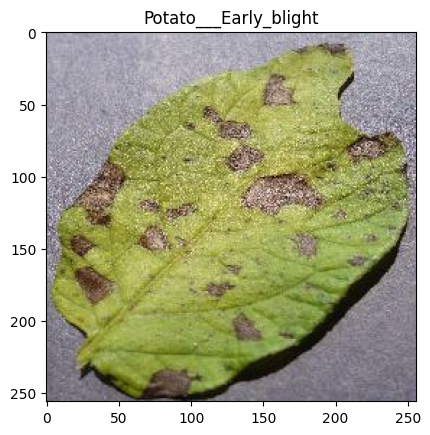

In [7]:
for image_batch,label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(disease_name[label_batch[0]])

In [8]:
def train_test_split(df,train_split=.8,val_split=.1,test_split=.1,shuffle=True,shuffle_size=1000):
  if shuffle:
    df=df.shuffle(shuffle_size,seed=12)

  len_data_set=len(df)

  train_size=int(train_split*len_data_set)
  val_size=int(val_split*len_data_set)

  train_df=df.take(train_size)
  val_df=df.skip(train_size).take(val_size)
  test_df=df.skip(train_size).skip(val_size)

  return train_df,val_df,test_df

In [9]:
  train_df,val_df,test_df=train_test_split(dataset)

In [10]:
print("length of train = ",len(train_df))
print("length of test = ",len(test_df))
print("length of val = ",len(val_df))

length of train =  54
length of test =  8
length of val =  6


In [11]:
train_df=train_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_df=test_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_df=val_df.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [12]:
resize_rescale= tf.keras.Sequential([
    layers.Rescaling(1.0/255),
    layers.Resizing(img_size, img_size)
])

In [13]:
data_augmented= tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

In [14]:
model=models.Sequential([
    resize_rescale,
    data_augmented,
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(batch_size,img_size,img_size,channel)),
    layers.MaxPool2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

     layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D((2,2)),

    layers.Flatten(),

    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])

#

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.build(input_shape=(batch_size,img_size,img_size,channel));

In [16]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (32, 256, 256, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (32, 254, 254, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (32, 127, 127, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (32, 125, 125, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (32, 62, 62, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (32, 60, 60, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (32, 30, 30, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (32, 28, 28, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (32, 14, 14, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (32, 12, 12, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (32, 6, 6, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (32, 4, 4, 64)              │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (32, 2, 2, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (32, 256)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (32, 64)                    │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (32, 3)                     │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [18]:
hstory=model.fit(
    train_df,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1,
    validation_data=val_df
)

Epoch 1/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 503s 5s/step - accuracy: 0.4759 - loss: 0.9674 - val_accuracy: 0.4583 - val_loss: 0.9640
Epoch 2/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 258s 5s/step - accuracy: 0.6453 - loss: 0.7818 - val_accuracy: 0.7031 - val_loss: 0.6945
Epoch 3/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 263s 5s/step - accuracy: 0.7522 - loss: 0.5738 - val_accuracy: 0.8906 - val_loss: 0.2752
Epoch 4/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 251s 5s/step - accuracy: 0.8279 - loss: 0.3859 - val_accuracy: 0.8646 - val_loss: 0.3132
Epoch 5/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 255s 5s/step - accuracy: 0.8610 - loss: 0.3296 - val_accuracy: 0.9219 - val_loss: 0.2173
Epoch 6/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - accuracy: 0.8930 - loss: 0.2742 - val_accuracy: 0.9010 - val_loss: 0.2753
Epoch 7/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 250s 5s/step - accuracy: 0.9075 - loss: 0.2307 - val_accuracy: 0.9062 - val_loss: 0.2352
Epoch 8/10
54/54 ━━━━━━━━━━━━━━━━━━━━ 261s 5s/step - accuracy: 0.8938 - loss: 0.2514 - val_accuracy: 0.9479 - v

In [19]:
 scores=model.evaluate(test_df)

8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step - accuracy: 0.9015 - loss: 0.2771


In [20]:
scores

[0.26154592633247375, 0.90234375]

In [21]:
hstory.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [22]:
hstory.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [23]:
acc=hstory.history['accuracy']
loss=hstory.history['loss']
val_loss=hstory.history['val_loss']
val_acc=hstory.history['val_accuracy']
#####################################



Text(0.5, 1.0, 'trainig an validation')

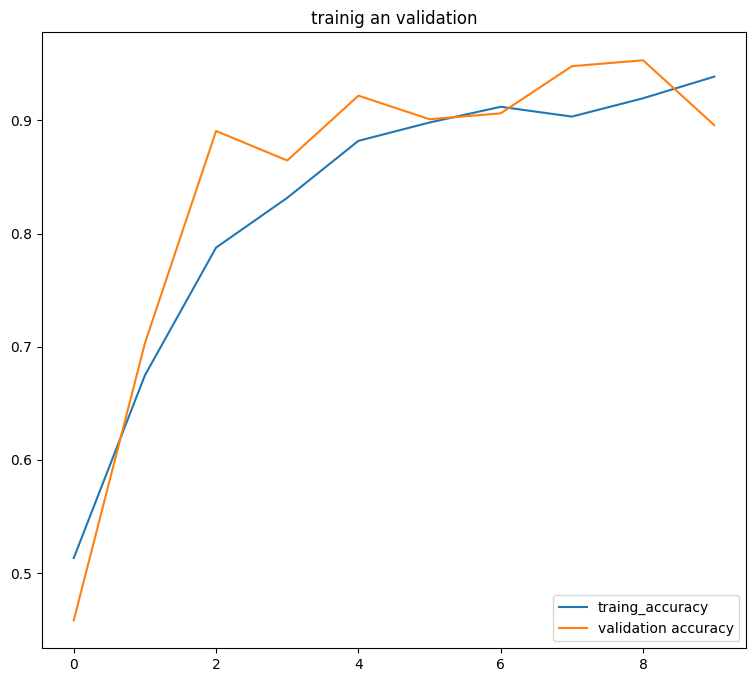

In [24]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='traing_accuracy')
plt.plot(range(epochs),val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('trainig an validation')

In [25]:
def predict(model,img):
  img_arr=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
  img_arr=tf.expand_dims(img_arr,0)

  prediction=model.predict(img_arr)

  name=disease_name[np.argmax(prediction[0])]
  confidence=100*(np.max(prediction[0]),2)

  return name,confidence





1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


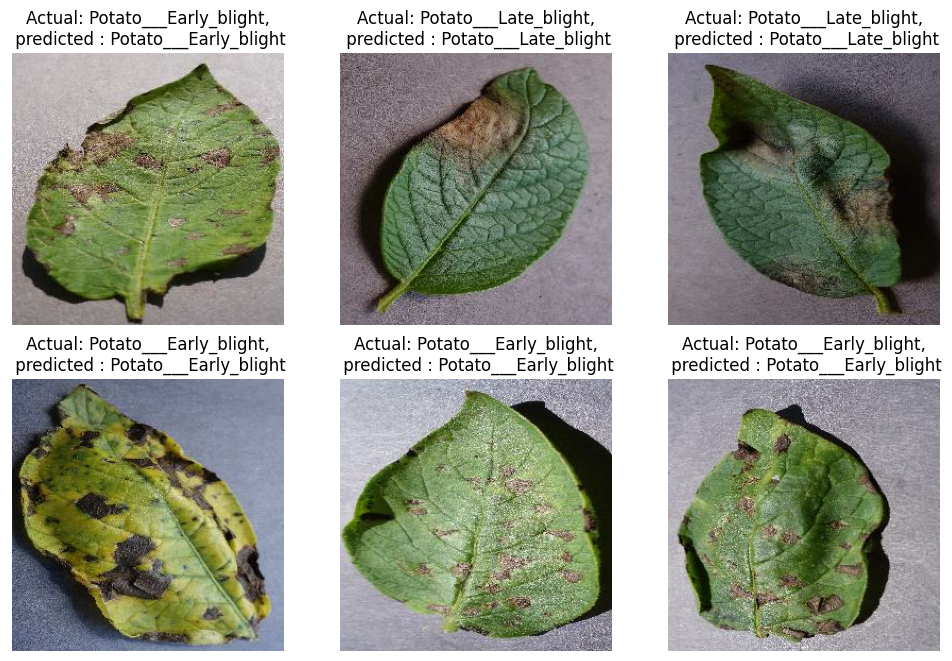

In [28]:
plt.figure(figsize=(12,12))

for images ,labels in test_df.take(1):
  for i in range(6):
    px=plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))

    name_of_disease,confience=predict(model,images[i].numpy())
    real_disease_name=disease_name[labels[i]]

    plt.axis("off")
    plt.title(f"Actual: {real_disease_name},\n predicted : {name_of_disease}")